In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
purchase_behaviour_df = pd.read_csv("purchase_behaviour.csv")
transaction_data_df = pd.read_csv("transaction_data.csv")

In [3]:
purchase_behaviour_df.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
purchase_behaviour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
transaction_data_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [6]:
transaction_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [7]:
unique_values1 = purchase_behaviour_df['PREMIUM_CUSTOMER'].unique()
# Print the unique values in customer categories
print("\nUnique values in 'PREMIUM_CUSTOMER' column:")
print(unique_values1)

unique_values2 = purchase_behaviour_df['LIFESTAGE'].unique()
# Print the unique values in lifestage
print("\nUnique values in 'LIFESTAGE' column:")
print(unique_values2)


Unique values in 'PREMIUM_CUSTOMER' column:
['Premium' 'Mainstream' 'Budget']

Unique values in 'LIFESTAGE' column:
['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']


### So here we know that there are threee types of customers and 7 types of lifestages

In [8]:
# Display summary statistics
print("\nPurchase Behaviour Summary:\n", purchase_behaviour_df.describe(include='all'))
print("\nTransaction Data Summary:\n", transaction_data_df.describe(include='all'))


Purchase Behaviour Summary:
         LYLTY_CARD_NBR LIFESTAGE PREMIUM_CUSTOMER
count     7.263700e+04     72637            72637
unique             NaN         7                3
top                NaN  RETIREES       Mainstream
freq               NaN     14805            29245
mean      1.361859e+05       NaN              NaN
std       8.989293e+04       NaN              NaN
min       1.000000e+03       NaN              NaN
25%       6.620200e+04       NaN              NaN
50%       1.340400e+05       NaN              NaN
75%       2.033750e+05       NaN              NaN
max       2.373711e+06       NaN              NaN

Transaction Data Summary:
                  DATE     STORE_NBR  LYLTY_CARD_NBR        TXN_ID  \
count   264836.000000  264836.00000    2.648360e+05  2.648360e+05   
unique            NaN           NaN             NaN           NaN   
top               NaN           NaN             NaN           NaN   
freq              NaN           NaN             NaN           NaN 

In [9]:
print("purchase_behaviour_df:-",purchase_behaviour_df.columns)
print()
print("transaction_data_df:-",transaction_data_df.columns)

purchase_behaviour_df:- Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

transaction_data_df:- Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')


#### As from above analysis we know that column = LYLTY_CARD_NBR is same in both the dataset so we are going to combine then on the basis of this column

In [10]:
# Merge datasets
merged_df = transaction_data_df.merge(purchase_behaviour_df, on="LYLTY_CARD_NBR")

In [11]:
# Check for missing values
print("\nMissing Values:")
print(merged_df.isnull().sum())


Missing Values:
DATE                0
STORE_NBR           0
LYLTY_CARD_NBR      0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64


In [12]:
merged_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,MIDAGE SINGLES/COUPLES,Budget
2,43414,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,MIDAGE SINGLES/COUPLES,Budget
3,43533,1,1307,347,54,CCs Original 175g,1,2.1,MIDAGE SINGLES/COUPLES,Budget
4,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,MIDAGE SINGLES/COUPLES,Budget


In [13]:
# Most loyal customers (highest total spend)
loyal_customers = (
    merged_df.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
    .head(10)
)

In [14]:
# Customer segmentation analysis
loyal_customer_segment = (
    loyal_customers.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
)

In [15]:
# Top 3 most profitable products
top_products = (
    merged_df.groupby(["PROD_NBR", "PROD_NAME"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
    .head(3)
)

In [16]:
# Most loyal customers (highest total spend)
loyal_customers = (
    merged_df.groupby(["LYLTY_CARD_NBR", "LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
    .head(10)
)

## EDA

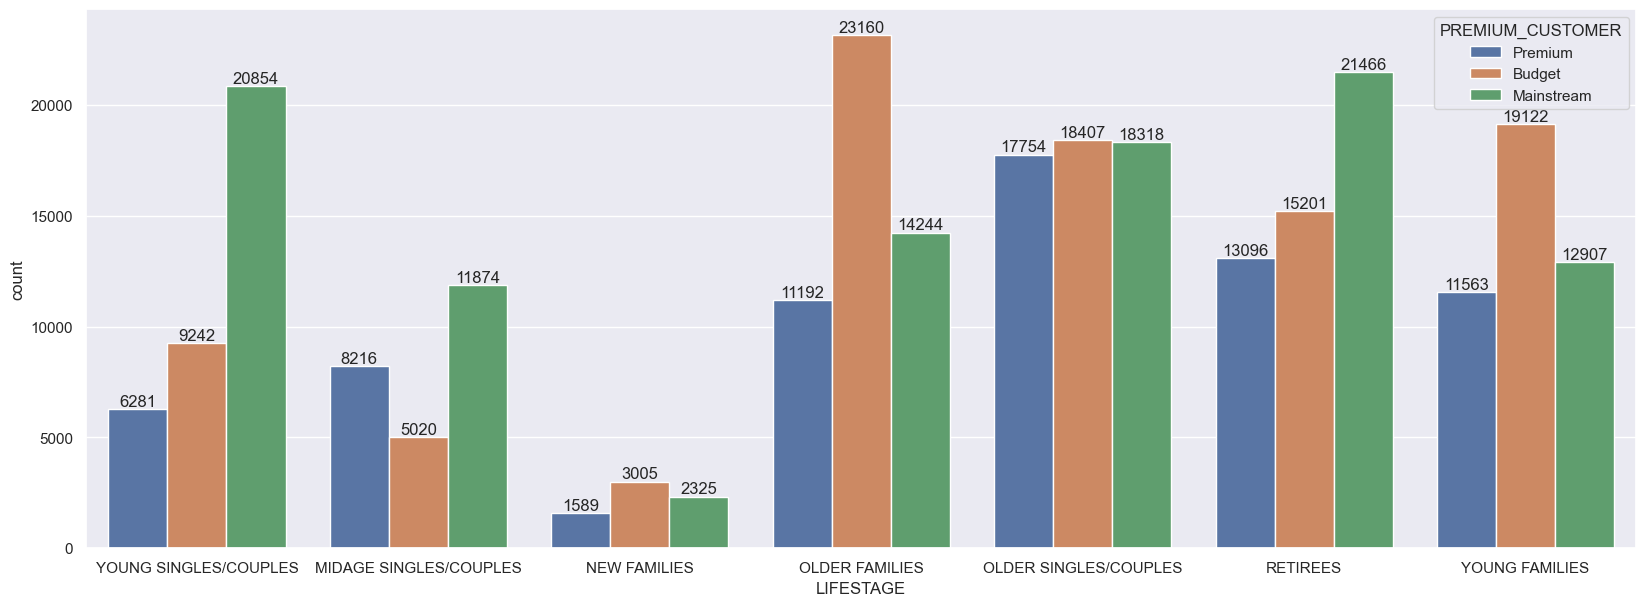

In [17]:
sns.set(rc={'figure.figsize':(20,7)})
ax=sns.countplot(x='LIFESTAGE',hue='PREMIUM_CUSTOMER',data=merged_df)
for bars in ax.containers:
    ax.bar_label(bars)

#### => from above graph we can say that
#### 1. Older Families have most budget customers 
#### 2.Olders Singles/couples are premium ones 
#### 3. Young Singles and couples are Mainstreams  

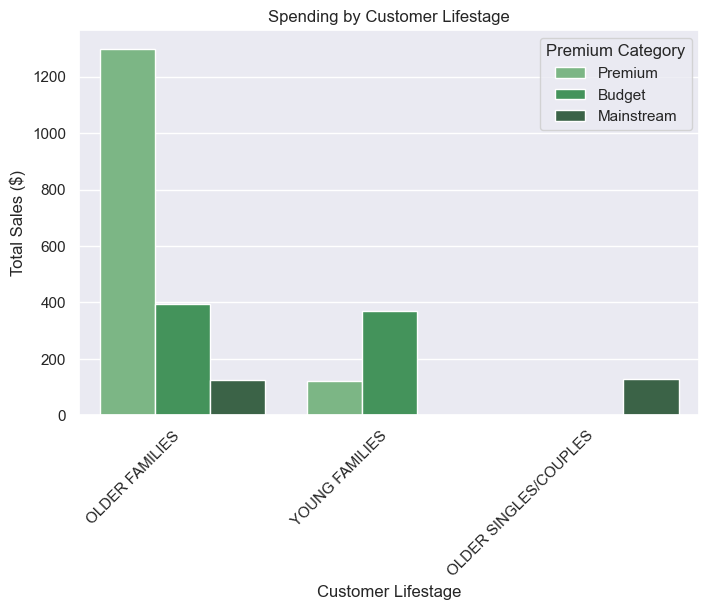

In [18]:
# Plot customer segments
plt.figure(figsize=(8, 5))
sns.barplot(x=loyal_customer_segment["LIFESTAGE"], y=loyal_customer_segment["TOT_SALES"], hue=loyal_customer_segment["PREMIUM_CUSTOMER"], palette='Greens_d')
plt.xlabel("Customer Lifestage")
plt.ylabel("Total Sales ($)")
plt.title("Spending by Customer Lifestage")
plt.xticks(rotation=45, ha='right')
plt.legend(title="Premium Category")
plt.show()

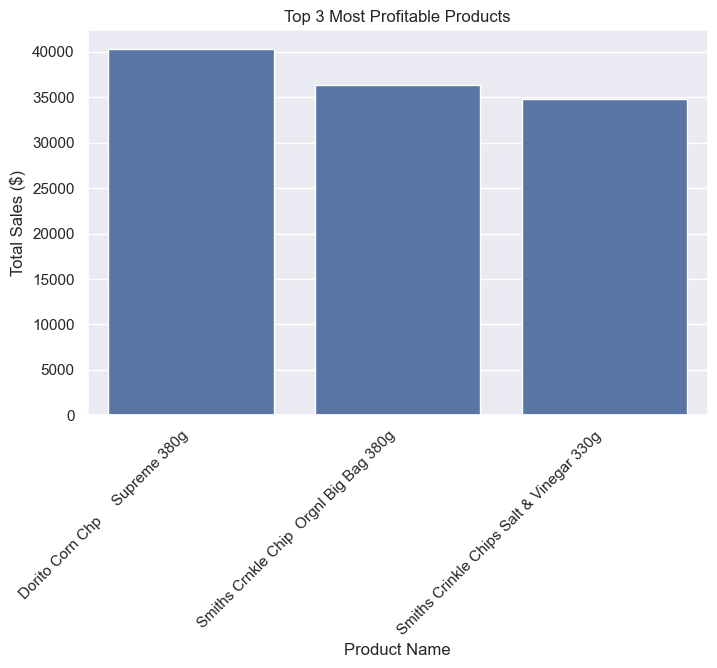

In [19]:
# Plot top products
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products["PROD_NAME"], y=top_products["TOT_SALES"])
plt.xlabel("Product Name")
plt.ylabel("Total Sales ($)")
plt.title("Top 3 Most Profitable Products")
plt.xticks(rotation=45, ha='right')
plt.show()

### => from above graph we can say that  "Dorito Corn Chip Supreme 380g" is the Top Product out of 114 products

In [20]:
unique_values3 = merged_df['PROD_NAME'].unique()
# Print the unique values in lifestage
print("\nUnique values in 'PROD_NAME' column:")
print(unique_values3)
print("Total Products:",len(unique_values3))


Unique values in 'PROD_NAME' column:
['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'WW Original Stacked Chips 160g' 'CCs Original 175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Tyrrells Crisps     Lightly Salted 165g'
 'Kettle Tortilla ChpsFeta&Garlic 150g' 'Dorito Corn Chp     Supreme 380g'
 'Doritos Mexicana    170g' 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Kettle Original 175g' 'Tyrrells Crisps     Ched & Chives 165g'
 'Infuzions BBQ Rib   Prawn Crackers 110g'
 'Grain Waves         Sweet Chilli 210g'
 'Old El Paso Salsa   Dip Tomato Med 300g'
 'Doritos Corn Chip Southern Chicken 150g'
 'Thins Potato Chips  Hot & Spicy 175g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Red Rock Deli Thai  Chilli&Lime 150g'
 'GrnWves Plus Btroot & Chilli Jam 180g'
 'WW D/Style Chip     Sea Salt 200g' 'Thins Chips Light&  Tangy 175g'
 'Grain W

C:\Users\abhin\AppData\Local\Temp\ipykernel_12392\2876483862.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


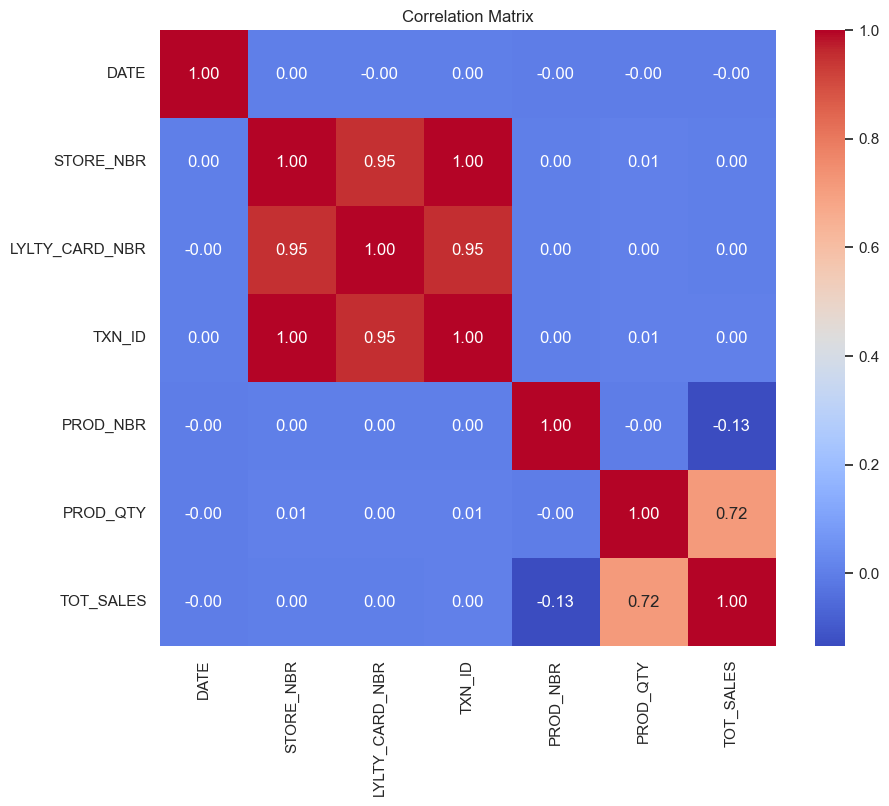

In [21]:
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Correlation Matrix")
plt.show()

In [22]:
# Print insights
print("\nTop 3 Profitable Products:\n", top_products)
print("\nMost Loyal Customer Segments:\n", loyal_customer_segment)


Top 3 Profitable Products:
     PROD_NBR                                 PROD_NAME  TOT_SALES
3          4          Dorito Corn Chp     Supreme 380g    40352.0
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
15        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2

Most Loyal Customer Segments:
                LIFESTAGE PREMIUM_CUSTOMER  TOT_SALES
2         OLDER FAMILIES          Premium    1300.00
0         OLDER FAMILIES           Budget     395.80
4         YOUNG FAMILIES           Budget     368.25
3  OLDER SINGLES/COUPLES       Mainstream     127.20
1         OLDER FAMILIES       Mainstream     126.80
5         YOUNG FAMILIES          Premium     122.80


# Summary

## A.Top 3 Most Profitable Products:
### 1.Dorito Corn Chp Supreme 380g 
### 2.Smiths Crnkle Chip Orgnl Big Bag 380g
### 3.Smiths Crinkle Chips Salt & Vinegar 330g
#### These are the highest revenue-generating products, indicating their strong customer demand.

## B.Most Loyal Customer Segment (Highest Spending):
### 1.Older Families (Premium Customers)
### 2.Older Families (Budget Customers)
### 3.Young Families (Budget Customers)
#### Older families (especially premium ones) contribute the most revenue, suggesting they are frequent buyers of high-value products.

## C.Hypothesis on Loyal Customers' Preferences:
### 1.Older families (Premium) are likely buying in bulk, possibly for family consumption or gatherings.
### 2.Doritos and Smith’s Chips (Top Products) are popular choices, possibly due to brand trust, taste preference, or party snacks.
### 3.Budget-conscious young families still spend significantly, indicating that they look for value-for-money options.